<a href="https://colab.research.google.com/github/rklepov/hse-cs-ml-2018-2019/blob/master/05-NN/03-cnn/cnn-architectures/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Обновим библиотеку до tf-2.0
!pip install --upgrade tf-nightly-gpu-2.0-preview

Requirement already up-to-date: tf-nightly-gpu-2.0-preview in /usr/local/lib/python3.6/dist-packages (2.0.0.dev20190319)


In [0]:
import tensorflow as tf
import numpy as np
from matplotlib.pylab import plt
%matplotlib inline

In [3]:
tf.__version__

'2.0.0-dev20190319'

In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32,3)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
50000/50000 [==============================] - 11s 211us/sample - loss: 1.9575 - accuracy: 0.2909
Epoch 2/5
50000/50000 [==============================] - 9s 187us/sample - loss: 1.8310 - accuracy: 0.3373
Epoch 3/5
50000/50000 [==============================] - 10s 193us/sample - loss: 1.7828 - accuracy: 0.3541
Epoch 4/5
50000/50000 [==============================] - 9s 188us/sample - loss: 1.7565 - accuracy: 0.3660
Epoch 5/5
10000/10000 [==============================] - 1s 113us/sample - loss: 1.6433 - accuracy: 0.4044


[1.6432778736114502, 0.4044]

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(80,3,activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(160,3,activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
50000/50000 [==============================] - 18s 365us/sample - loss: 1.3424 - accuracy: 0.5263
Epoch 2/5
50000/50000 [==============================] - 18s 356us/sample - loss: 0.9885 - accuracy: 0.6572
Epoch 3/5
50000/50000 [==============================] - 21s 422us/sample - loss: 0.8278 - accuracy: 0.7167
Epoch 4/5
50000/50000 [==============================] - 29s 575us/sample - loss: 0.7200 - accuracy: 0.7513
Epoch 5/5
10000/10000 [==============================] - 3s 327us/sample - loss: 0.9660 - accuracy: 0.6882


[0.9659955164909363, 0.6882]

In [0]:
tmp = np.array([1,2,1,1,1])

In [8]:
np.convolve(tmp,[1,2],mode='valid')

array([4, 5, 3, 3])

In [9]:
for i in range(0,tmp.shape[0]-1):
    print('Исходное значение -',tmp[i:i+2],'Результат свертки - ',np.dot(tmp[i:i+2],[2,1]))
# 

Исходное значение - [1 2] Результат свертки -  4
Исходное значение - [2 1] Результат свертки -  5
Исходное значение - [1 1] Результат свертки -  3
Исходное значение - [1 1] Результат свертки -  3


In [10]:
np.convolve(tmp,[1,2],mode='same')

array([1, 4, 5, 3, 3])

In [11]:
tmp = np.array([1,2,1,1,1])
tmp2 = np.append(np.array([0]),tmp)
for i in range(0,tmp2.shape[0]-1):
    print('Исходное значение -',tmp2[i:i+2],'Результат шага свертки - ',np.dot(tmp2[i:i+2],[2,1]))
# 

Исходное значение - [0 1] Результат шага свертки -  1
Исходное значение - [1 2] Результат шага свертки -  4
Исходное значение - [2 1] Результат шага свертки -  5
Исходное значение - [1 1] Результат шага свертки -  3
Исходное значение - [1 1] Результат шага свертки -  3


In [12]:
np.convolve(tmp,[1,2],mode='full')

array([1, 4, 5, 3, 3, 2])

In [13]:
tmp = np.array([1,2,1,1,1])
tmp2 = np.append(np.array([0]),tmp)
tmp2 = np.append(tmp2,np.array([0]))
for i in range(0,tmp2.shape[0]-1):
    print('Исходное значение -',tmp2[i:i+2],'Результат шага свертки - ',np.dot(tmp2[i:i+2],[2,1]))

Исходное значение - [0 1] Результат шага свертки -  1
Исходное значение - [1 2] Результат шага свертки -  4
Исходное значение - [2 1] Результат шага свертки -  5
Исходное значение - [1 1] Результат шага свертки -  3
Исходное значение - [1 1] Результат шага свертки -  3
Исходное значение - [1 0] Результат шага свертки -  2


In [0]:
# https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html - ДЕМО

In [0]:
def show_img(img,cmap=None):
    plt.figure(figsize=(8,8))
    fig=plt.imshow(img,cmap=cmap);
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [16]:
from google.colab import files

uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [17]:
!ls -la

total 72
drwxr-xr-x 1 root root  4096 Mar 19 19:59 .
drwxr-xr-x 1 root root  4096 Mar 19 19:31 ..
-rw-r--r-- 1 root root 53143 Mar 19 19:59 cat.jpg
drwxr-xr-x 1 root root  4096 Mar  8 17:25 .config
drwxr-xr-x 3 root root  4096 Mar 19 19:58 logs
drwxr-xr-x 1 root root  4096 Mar  8 17:26 sample_data


In [0]:
cat = plt.imread('cat.jpg')

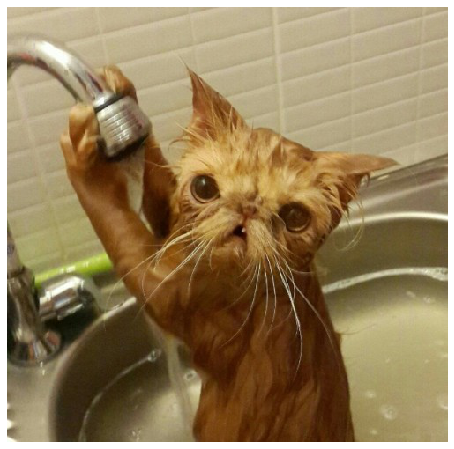

In [19]:
show_img(cat)

In [0]:
from scipy.ndimage.filters import convolve
from skimage.color import rgb2gray

In [0]:
gray_cat = np.uint8(rgb2gray(cat)*255)

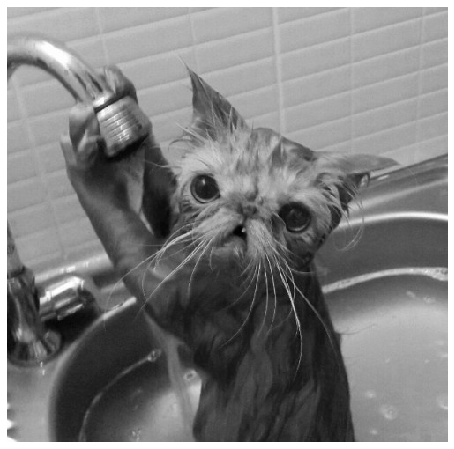

In [22]:
show_img(gray_cat,cmap='gray')

In [0]:
k = np.array([[-1,-1,-1],
              [-1,8,-1],
              [-1,-1,-1]])

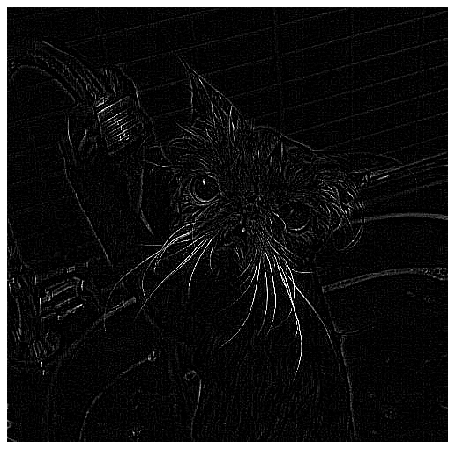

In [24]:
show_img(np.clip(convolve(gray_cat.astype(np.float32),k),0,255),cmap='gray')

## Useful links

https://paperswithcode.com/sota

http://setosa.io/ev/image-kernels/

https://github.com/vdumoulin/conv_arithmetic

http://image-net.org/explore

https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html